# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


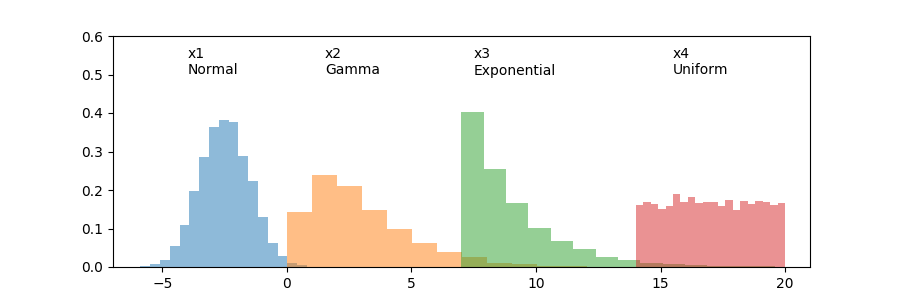

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

In [3]:
import matplotlib.animation as animation
from matplotlib.widgets import Button,Slider


<IPython.core.display.Javascript object>


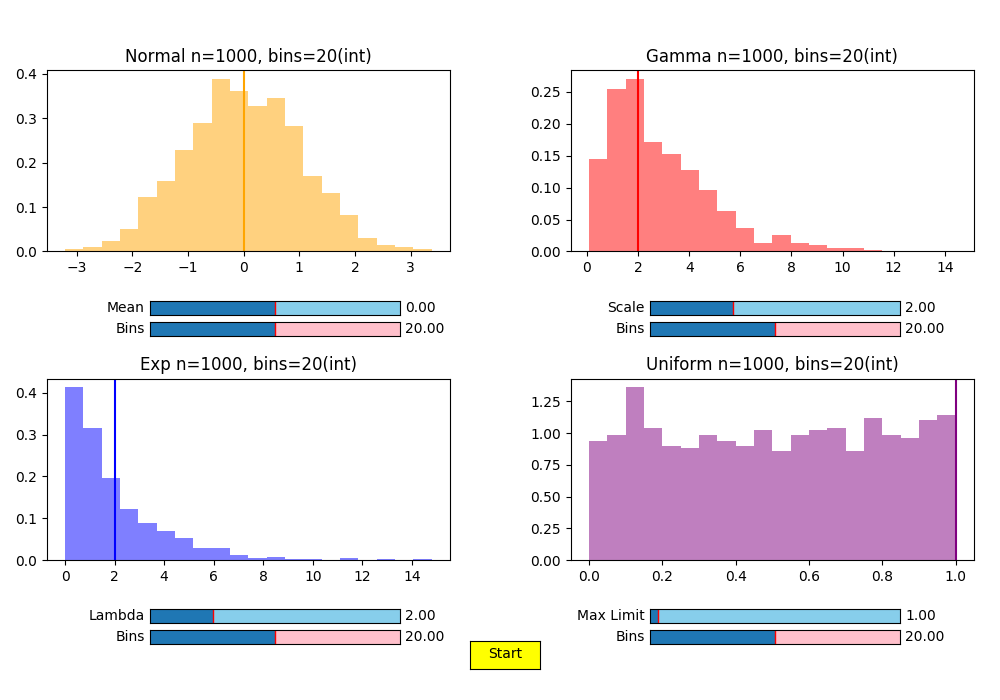

0

In [10]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,7))

fig.tight_layout()#created spaces between laayouts using this.
fig.subplots_adjust(hspace=0.7,wspace=0.3,top=0.9,bottom=0.2) #Adjusting subplots

axcolor = "skyblue"
axcolorBins = 'pink'

#Slider for Normal distribution with alterable mean
axNormal = plt.axes([0.15, 0.55, 0.25, 0.02], facecolor=axcolor)
sliderNormal = Slider(axNormal, 'Mean', -2, 2, valinit=0)

x1 = [np.random.normal(0, 1, 10000)]

def updateNormal(val):
    x1[0] = np.random.normal(sliderNormal.val, 1, 10000)

sliderNormal.on_changed(updateNormal)


#Slider for Normal distribution Bins
axNormalBins = plt.axes([0.15, 0.52, 0.25, 0.02], facecolor=axcolorBins)
sliderNormalBins = Slider(axNormalBins, 'Bins', 5, 35, valinit=20)

xb1 = [20]

def updateNormalBins(val):
    xb1[0] = sliderNormalBins.val
    
sliderNormalBins.on_changed(updateNormalBins)


#Slider for Gamma distribution with alterable scale
axGamma = plt.axes([0.65, 0.55, 0.25, 0.02], facecolor=axcolor)
sliderGamma = Slider(axGamma, 'Scale', 1, 4, valinit=2)

x2 = [np.random.gamma(2,1.5, 10000)]

def updateGamma(val):
    x2[0] = np.random.gamma(2,sliderGamma.val, 10000)

sliderGamma.on_changed(updateGamma)

#Slider for Gamma distribution Bins
axGammaBins = plt.axes([0.65, 0.52, 0.25, 0.02], facecolor=axcolorBins)
sliderGammaBins = Slider(axGammaBins, 'Bins', 5, 35, valinit=20)

xb2 = [20]

def updateGammaBins(val):
    xb2[0] = sliderGammaBins.val
    
sliderGammaBins.on_changed(updateGammaBins)




#Slider for Exponential distribution with alterable lambda
axExp = plt.axes([0.15, 0.11, 0.25, 0.02], facecolor=axcolor)
sliderExp = Slider(axExp, 'Lambda', 1, 5, valinit=2)

x3 = [np.random.exponential(2, 10000)]

def updateExp(val):
    x3[0] = np.random.exponential(sliderExp.val,10000)

sliderExp.on_changed(updateExp)


#Slider for Exponential distribution Bins
axExpBins = plt.axes([0.15, 0.08, 0.25, 0.02], facecolor=axcolorBins)
sliderExpBins = Slider(axExpBins, 'Bins', 5, 35, valinit=20)

xb3 = [20]

def updateExpBins(val):
    xb3[0] = sliderExpBins.val
    
sliderExpBins.on_changed(updateExpBins)


#Slider for Uniform distribution with alterable Max limit
axUniform = plt.axes([0.65, 0.11, 0.25, 0.02], facecolor=axcolor)
sliderUniform = Slider(axUniform, 'Max Limit', 0, 30, valinit=1)

x4 = [np.random.uniform(0,1, 10000)]

def updateUniform(val):
    x4[0] = np.random.uniform(1,sliderUniform.val,10000)

sliderUniform.on_changed(updateUniform)


#Slider for Uniform distribution Bins
axUniformBins = plt.axes([0.65, 0.08, 0.25, 0.02], facecolor=axcolorBins)
sliderUniformBins = Slider(axUniformBins, 'Bins', 5, 35, valinit=20)

xb4 = [20]

def updateUniformBins(val):
    xb4[0] = sliderUniformBins.val
    
sliderUniformBins.on_changed(updateUniformBins)



#Animation fucntion.
def update(curr):
    curr = curr*10
    if(curr == 1000-100):
        anim[0].event_source.stop()
        

    ax1.cla()
    ax1.hist(x1[0][:100+curr], normed = True, bins = int(xb1[0]) , alpha = 0.5, color = 'orange')
    ax1.set_title('Normal n={}, bins={}(int)'.format(100+curr,int(xb1[0])))
    ax1.axvline(x=sliderNormal.val,color='orange')

    ax2.cla()
    ax2.hist(x2[0][:100+curr], normed = True, bins = int(xb2[0]), alpha = 0.5, color = 'red')
    ax2.set_title('Gamma n={}, bins={}(int)'.format(100+curr,int(xb2[0])))
    ax2.axvline(x=sliderGamma.val,color='red')

    ax3.cla()
    ax3.hist(x3[0][:100+curr], normed = True, bins = int(xb3[0]), alpha = 0.5, color = 'blue')
    ax3.set_title('Exp n={}, bins={}(int)'.format(100+curr,int(xb3[0])))
    ax3.axvline(x=sliderExp.val,color='blue')

    ax4.cla()
    ax4.hist(x4[0][:100+curr], normed = True, bins = int(xb4[0]), alpha = 0.5, color = 'purple')
    ax4.set_title('Uniform n={}, bins={}(int)'.format(100+curr,int(xb4[0])))
    ax4.axvline(x=sliderUniform.val,color='purple')


#Start button and function to start animation
buttonAxes = plt.axes([0.47, 0.045, 0.07, 0.04])
button = Button(buttonAxes, 'Start', color='yellow', hovercolor='0.975')    

anim = [0]
def start(event):
    anim[0] = animation.FuncAnimation(fig,update,interval=1)
button.on_clicked(start)

